<a href="https://colab.research.google.com/github/fpaludi/DeepLearningDatitos/blob/master/TP1_IntroPandasTorch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#@title Aprendizaje Profundo | Otoño 2021 by Datitos{display-mode: "form" }
#@markdown ![71335171.png](data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAMgAAADICAIAAAAiOjnJAAACwElEQVR4nOzdMY7iQBBA0WU197/FnJNNJ/FqWvLHZfd7McIGfVVQos3X+/3+A2f7e/UN8EzCIiEsEsIiISwSwiIhLBLCIiEsEsIiISwSwiIhLBLCIiEsEsIiISwSwiIhLBLCIiEsEsIiISwSwiIhLBLCIiEsEsIiISwSwiIhLBLCIiEsEsIiISwSwiIhLBLCIiEsEsIiISwSwiIhLBJfV9/A/7xer6XX3/1/gZ70eU0sEsIiISwSwiIhLBLCIiEsEiP2WEf7m9U9zVnvU9vh85pYJIRFQlgkhEVCWCSERUJYJEbssc5ytL+5at8zec9UM7FICIuEsEgIi4SwSAiLhLBIPGqPdWR1v1VfdwcmFglhkRAWCWGREBYJYZEQFokt9lhHdt4z1UwsEsIiISwSwiIhLBLCIiEsEh/dY+18zq4w7RzlTyYWCWGREBYJYZEQFglhkRAWiS1+jzVhr/Mbd7nP3zCxSAiLhLBICIuEsEgIi4SwSDxqj1U/72r1ulc9l2sCE4uEsEgIi4SwSAiLhLBICIvE7D3W9/fSy6/63dLqdZfvc/F7mMDEIiEsEsIiISwSwiIhLBLCIjF7j3WSs87rTXufyUwsEsIiISwSwiIhLBLCIiEsEq8Ju5N6r3OXc3xP2oeZWCSERUJYJIRFQlgkhEVCWCRG7LGOTN7TfNIdvwcTi4SwSAiLhLBICIuEsEgIi8Toc4U7Pyf9p8n7qiMmFglhkRAWCWGREBYJYZEQFonRe6wjd9zr7MbEIiEsEsIiISwSwiIhLBLCIiEsEsIiISwSwiIhLBLCIiEsEsIiISwSwiIhLBLCIiEsEsIiISwSwiIhLBLCIiEsEsIiISwSwiIhLBLCIiEsEsIiISwSwiIhLBLCIiEsEsIiISwSwiIhLBLCIiEsEsIiISwSwiIhLBLCIiEsEsIi8S8AAP//HtRtH09JwIEAAAAASUVORK5CYII=)
#El siguiente notebook fue diseñado por Pablo Marinozi como el primer trabajo práctico correspondiente a la versión de Otoño del 2021 del curso Aprendizaje Profundo organizado por Datitos 
#Para mayor información consultar https://datitos.github.io/curso-aprendizaje-profundo/#calendario

# Trabajo Práctico N°1: Preprocesamiento y Manipulación de Datos

Este trabajo práctico tiene dos partes.

El objetivo de la primera es aprender cómo preprocesar datos usando la biblioteca `pandas`.

El objetivo de la segunda es realizar ejercicios para reforzar el manejo de tensores con `Pytorch`.

## Parte 0: Importar Librerías

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import torch

## Parte 1: Preprocesamiento de Datos

### Valores Faltantes



En esta sección del práctico vamos a trabajar con el dataset relacionado a la hepatitis. El siguiente código descarga el csv.

In [ ]:
!gdown https://drive.google.com/uc?id=1UmZdyg15LEmlNIqCbpQTChdpPKoHcru1

Downloading...
From: https://drive.google.com/uc?id=1UmZdyg15LEmlNIqCbpQTChdpPKoHcru1
To: /content/hepatitis_csv.csv
100% 15.2k/15.2k [00:00<00:00, 5.79MB/s]


En primer lugar, importe los datos del archivo utilizando la biblioteca de `pandas` y conviértalos en un dataframe con la funcion `read_csv()`. Luego, a través del método `head(10)` imprima por pantalla solo las primeras 10 filas del conjunto de datos.

In [ ]:
df = pd.read_csv("/content/hepatitis_csv.csv")

Observamos que el dataset presenta algunos problemas. Por ejemplo, el valor de la columna `albumin` no está disponible para todas las filas. En algunos casos presenta el valor NaN, lo que significa que falta el valor.

Para verificar si nuestro dataset contiene valores faltantes, podemos usar la función `isna()`, que devuelve si una celda del conjunto de datos es NaN o no. Luego, deberemos contar cuántos valores faltantes hay para cada columna. 

In [ ]:
for col in df.columns:
  print(f"{col} has {df[col].isna().sum() / df.shape[0]:2.2f} % of NaN values")

age has 0.00 % of NaN values
sex has 0.00 % of NaN values
steroid has 0.01 % of NaN values
antivirals has 0.00 % of NaN values
fatigue has 0.01 % of NaN values
malaise has 0.01 % of NaN values
anorexia has 0.01 % of NaN values
liver_big has 0.06 % of NaN values
liver_firm has 0.07 % of NaN values
spleen_palpable has 0.03 % of NaN values
spiders has 0.03 % of NaN values
ascites has 0.03 % of NaN values
varices has 0.03 % of NaN values
bilirubin has 0.04 % of NaN values
alk_phosphate has 0.19 % of NaN values
sgot has 0.03 % of NaN values
albumin has 0.10 % of NaN values
protime has 0.43 % of NaN values
histology has 0.00 % of NaN values
class has 0.00 % of NaN values


Cuando se trata de valores faltantes, se pueden aplicar diferentes estrategias:

* ponerse en contacto con la fuente de datos para corregir los valores faltantes,
* eliminar los valores faltantes,
* reemplazar el valor faltante con algún valor y
* dejar el valor faltante como está.

La primera estrategia no siempre es factible y no creemos que necesiten nuestra ayuda para adoptar la última. En las siguientes subsecciones analizaremos las dos estrategias restantes.

#### Eliminar los valores faltantes

Hay dos maneras de eliminar los valores faltantes:

* eliminar las filas que contengan valores faltantes
* eliminar las columnas que los contengan.

Podemos usar `dropna()` para esta tarea especificando el eje a considerar. Si configuramos `axis=0`, descartamos toda la fila, si configuramos `axis=1`, descartamos toda la columna. 

Genere dos versiones nuevas del dataset utilizando la estrategia correspondiente en cada caso y analice los tamaños de los dataframes resultantes. 

In [ ]:
df_del_nan_row = df.dropna(axis=0)
df_del_nan_col = df.dropna(axis=1)
df_del_nan_row.shape, df_del_nan_col.shape

((80, 20), (155, 5))

Como alternativa, podemos especificar solo la columna en la que se debe aplicar la operación de dropping. En el siguiente ejemplo, solo se consideran las filas faltantes relacionadas con la columna `liver_big`. Esto se puede lograr a través del parámetro `subset`, que permite especificar el subconjunto de columnas donde aplicar la operación de dropping. Verifique si siguen existiendo valores NaN en el resto de las columnas.

In [ ]:
df_del_nan_subset_row = df.dropna(subset=["liver_big"], axis=0)
df_del_nan_subset_row.shape

(145, 20)

Estas columnas continuan teniendo NaN


In [ ]:
df_del_nan_subset_row.isna().any()

age                False
sex                False
steroid             True
antivirals         False
fatigue            False
malaise            False
anorexia           False
liver_big          False
liver_firm          True
spleen_palpable     True
spiders             True
ascites             True
varices             True
bilirubin           True
alk_phosphate       True
sgot                True
albumin             True
protime             True
histology          False
class              False
dtype: bool

Otra alternativa consiste en eliminar las columnas en las que se dispone de un cierto porcentaje de valores no nulos. Esto se puede lograr mediante el parámetro `thresh`. Intente utilizar este parámetro para mantener solo las columnas donde haya al menos el 80% de valores no nulos. 

In [ ]:
df_del_nan_thr_col = df.dropna(axis=1, thresh=80)
df_del_nan_thr_col.shape

(155, 20)

Todas las colimnas tienen al menos un 80% de valores validos


#### Reemplazar valores faltantes 

Una buena estrategia a la hora de trabajar son valores faltantes implica su reemplazo por otro valor. Por lo general, se adoptan las siguientes estrategias:

* para valores numéricos, reemplazar el valor faltante con el valor promedio de la columna
* para valores categóricos, reemplazar el valor faltante con el valor más frecuente de la columna

Para averiguar el tipo de datos de las columnas podemos  usar el atributo `dtypes` de la siguiente manera

In [ ]:
df.dtypes

age                  int64
sex                 object
steroid             object
antivirals            bool
fatigue             object
malaise             object
anorexia            object
liver_big           object
liver_firm          object
spleen_palpable     object
spiders             object
ascites             object
varices             object
bilirubin          float64
alk_phosphate      float64
sgot               float64
albumin            float64
protime            float64
histology             bool
class               object
dtype: object

Usando la función `select_dtypes()` podemos generar una lista que contenga los nombres de las columnas numéricas y otra que contenga los de la columnas categóricas filtrando por `np.number `y `np.object` respectivamente.

In [ ]:
num_df = df.select_dtypes(np.number)
cat_df = df.select_dtypes(np.object)

En todos los casos podemos usar la función `fillna()` para reemplazar los valores faltantes con algún valor pasado como parámetro. En el caso de las variables numéricas deberíamos reemplazarlo por la media (`mean()`) y en el caso de las variables categóricas por la moda (`mode()`). Al finalizar, comprobar si aun quedan valores faltantes en el dataset.

In [ ]:
num_df

,age,bilirubin,alk_phosphate,sgot,albumin,protime
0,30,1.0,85.0,18.0,4.0,NaN
1,50,0.9,135.0,42.0,3.5,NaN
2,78,0.7,96.0,32.0,4.0,NaN
3,31,0.7,46.0,52.0,4.0,80.0
4,34,1.0,NaN,200.0,4.0,NaN
...,...,...,...,...,...,...
150,46,7.6,NaN,242.0,3.3,50.0
151,44,0.9,126.0,142.0,4.3,NaN
152,61,0.8,75.0,20.0,4.1,NaN
153,53,1.5,81.0,19.0,4.1,48.0


In [ ]:
num_fill_na_df = num_df.fillna(value=num_df.mean(axis=0))
cat_fill_na_df = cat_df.fillna(value=cat_df.mode(axis=0).to_dict("records")[0])
fill_na_df = num_fill_na_df.join(cat_fill_na_df)
fill_na_df.isna().any()

age                False
bilirubin          False
alk_phosphate      False
sgot               False
albumin            False
protime            False
sex                False
steroid            False
fatigue            False
malaise            False
anorexia           False
liver_big          False
liver_firm         False
spleen_palpable    False
spiders            False
ascites            False
varices            False
class              False
dtype: bool

### Normalización de los datos

La normalización de datos implica ajustar los valores medidos en diferentes escalas a una escala común. Cuando se trata de dataframes, la normalización de datos permite ajustar valores referidos a diferentes columnas a una escala común. Esta operación es muy recomendable cuando las columnas de un dataframes se van a usar como features de entrada de un algoritmo de aprendizaje automático, ya que impide que el algoritmo le asigne mayores pesos a las features de mayor escala. 

La normalización se aplica solo a las columnas que contienen valores numéricos. Existen cinco métodos de normalización:

* single feature scaling
* min max
* z score
* escala logaritmica
* clipping

En el resto del práctico, aplicamos cada método a una sola columna. Sin embargo, si vas a utilizar cada columna del conjunto de datos como features de entrada de un algoritmo de aprendizaje automático, ***tenés que aplicar el mismo método de normalización a todas las columnas***.

En esta sección vamos a usar el dataset provisto por la Protezione Civile Italiana relacionado a los casos de COVID-19 registrados desde el inicio de la pandemia. Este dataset se actualiza diariamente y ell siguiente código se encarga de descargarlo.

In [ ]:
df_italia = pd.read_csv('https://raw.githubusercontent.com/pcm-dpc/COVID-19/master/dati-regioni/dpc-covid19-ita-regioni.csv')
df_italia.head(10)

,data,stato,codice_regione,denominazione_regione,lat,long,ricoverati_con_sintomi,terapia_intensiva,totale_ospedalizzati,isolamento_domiciliare,totale_positivi,variazione_totale_positivi,nuovi_positivi,dimessi_guariti,deceduti,casi_da_sospetto_diagnostico,casi_da_screening,totale_casi,tamponi,casi_testati,note,ingressi_terapia_intensiva,note_test,note_casi,totale_positivi_test_molecolare,totale_positivi_test_antigenico_rapido,tamponi_test_molecolare,tamponi_test_antigenico_rapido,codice_nuts_1,codice_nuts_2
0,2020-02-24T18:00:00,ITA,13,Abruzzo,42.351222,13.398438,0,0,0,0,0,0,0,0,0,NaN,NaN,0,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2020-02-24T18:00:00,ITA,17,Basilicata,40.639471,15.805148,0,0,0,0,0,0,0,0,0,NaN,NaN,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2020-02-24T18:00:00,ITA,18,Calabria,38.905976,16.594402,0,0,0,0,0,0,0,0,0,NaN,NaN,0,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2020-02-24T18:00:00,ITA,15,Campania,40.839566,14.250850,0,0,0,0,0,0,0,0,0,NaN,NaN,0,10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2020-02-24T18:00:00,ITA,8,Emilia-Romagna,44.494367,11.341721,10,2,12,6,18,0,18,0,0,NaN,NaN,18,148,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,2020-02-24T18:00:00,ITA,6,Friuli Venezia Giulia,45.649435,13.768136,0,0,0,0,0,0,0,0,0,NaN,NaN,0,58,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,2020-02-24T18:00:00,ITA,12,Lazio,41.892770,12.483667,1,1,2,0,2,0,2,1,0,NaN,NaN,3,124,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,2020-02-24T18:00:00,ITA,7,Liguria,44.411493,8.932699,0,0,0,0,0,0,0,0,0,NaN,NaN,0,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,2020-02-24T18:00:00,ITA,3,Lombardia,45.466794,9.190347,76,19,95,71,166,0,166,0,6,NaN,NaN,172,1463,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,2020-02-24T18:00:00,ITA,11,Marche,43.616760,13.518875,0,0,0,0,0,0,0,0,0,NaN,NaN,0,16,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


A continuación elimine todas las columnas que contengan valores faltantes.

In [ ]:
df_italia.shape

(8211, 30)

In [ ]:
df_no_na = df_italia.dropna(axis=1)

#### Single Feature Scaling


Este método convierte cada valor de una columna en un número entre 0 y 1. El nuevo valor se calcula como el valor actual dividido por el valor máximo de la columna. Implementelo en la columna `tamponi`

In [ ]:
df_tamponi_scaled = df_no_na["tamponi"] / df_no_na["tamponi"].max()

In [ ]:
df_tamponi_scaled.describe()

count    8211.000000
mean        0.088168
std         0.138125
min         0.000000
25%         0.009055
50%         0.033387
75%         0.098077
max         1.000000
Name: tamponi, dtype: float64

#### Min Max

De manera similar al método anterior, Min Max convierte cada valor de una columna en un número entre 0 y 1. El nuevo valor se calcula como la diferencia entre el valor actual y el valor mínimo, dividido por el rango de los valores de la columna. Implementelo para la columna `totale_casi`

In [ ]:
df_totale_case_minmax = (df_no_na["totale_casi"] - df_no_na["totale_casi"].min()) / (df_no_na["totale_casi"].max() - df_no_na["totale_casi"].min())
df_totale_case_minmax.describe()

count    8211.000000
mean        0.063794
std         0.124399
min         0.000000
25%         0.003839
50%         0.012883
75%         0.055511
max         1.000000
Name: totale_casi, dtype: float64

#### Z Score

Z-Score convierte cada valor de una columna en un número alrededor de 0. Los valores típicos obtenidos por una transformación de z-score oscilan entre -3 y 3. 

El nuevo valor se calcula como la diferencia entre el valor actual y el valor promedio, dividido por la desviación estándar. El valor promedio de una columna se puede obtener a través de la función `mean()`, mientras que la desviación estándar a través de la función `std()`. 

Implementelo para la columna ```deceduti```



In [ ]:
df_deceduti_z = (df_no_na["deceduti"] - df_no_na["deceduti"].mean()) / df_no_na["deceduti"].std()
df_deceduti_z.describe()

count    8.211000e+03
mean    -1.760375e-15
std      1.000000e+00
min     -5.031985e-01
25%     -4.666703e-01
50%     -3.761642e-01
75%     -2.298082e-02
max      6.409005e+00
Name: deceduti, dtype: float64

La siguiente función dibuja un gráfico de caja con los datos que recibe para poder observar su distribución. Utilicela pasando la versión normalizada de la columna `deceduti` del dataset como parámetro.

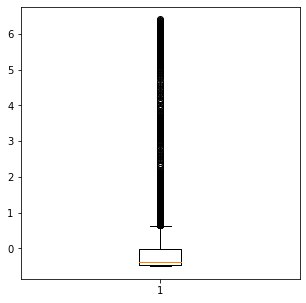

In [ ]:
def boxplot(data):
  fig = plt.figure(figsize =(5, 5)) 
  plt.boxplot(data)
  plt.show()

boxplot(df_deceduti_z)

En el gráfico de caja anterior se puede observar que a partir de cierto valor de Z los valores son outliers o valores anómalos.

La siguiente función también realiza un gráfico de caja, pero antes filtra todos los valores outliers en base a un parámetro threshold. Llame a la función pasando la versión normalizada de la columna `deceduti` del dataset como parámetro `data`. Además elija un valor para el parámetro `threshold` de manera de eliminar todos los outliers del dataset. 

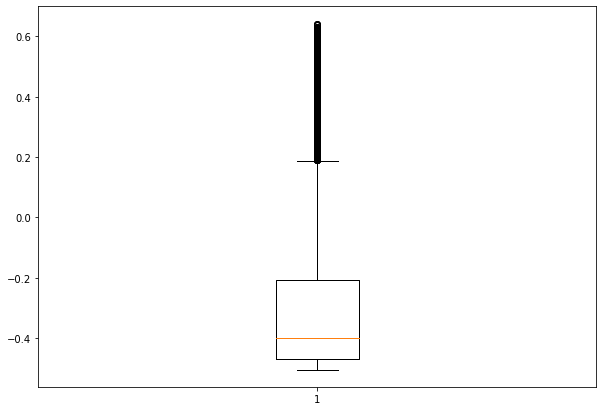

In [ ]:
def boxplot_sin_outliers(data, threshold):
  outliers = np.where((data - threshold > 0), True, np.where(data + threshold < 0, True, False))
  data_sin_outliers = data[~outliers]
  fig = plt.figure(figsize =(10, 7)) 
  plt.boxplot(data_sin_outliers )
  plt.show()

iqr = abs(df_deceduti_z.describe()["75%"] - df_deceduti_z.describe()["25%"])
th = df_deceduti_z.describe()["75%"] + iqr * 1.5

boxplot_sin_outliers(df_deceduti_z, th)

In [ ]:
th

0.6425534278172839

#### Escala logarítmica

Acá básicamente aplicamos la función `log()` a toda la columna. Implemente esta normalización para la columna `dimessi_guariti` Hay que tener cuidado porque el logaritmo de 0 está indeterminado. Les recomendamos utilizar [funciones lambda](https://www.kite.com/python/answers/how-to-use-an-if-statement-in-a-lambda-function-in-python) para sortear esta restricción.

In [ ]:
df_dimessi_guariti_log = df_no_na["dimessi_guariti"].apply(lambda x: np.log(x) if x else np.nan)

In [ ]:
df_dimessi_guariti_log.describe()

count    7909.000000
mean        8.582577
std         2.358408
min         0.000000
25%         7.249215
50%         8.729074
75%        10.193392
max        13.235258
Name: dimessi_guariti, dtype: float64

## Parte 2: Manipulación de Datos


Repasá lo visto en la clase 2 sobre manipulación de tensores e intentá resolver los siguientes ejercicios.

Primero generemos un tensor de 28x28 llenado con el valor 0.25 en todas sus celdas. Luego generemos un segundo tensor de 28x28 con el valor 0.5 y otro con el valor 0.75

In [ ]:
tensor_25 = torch.ones((28, 28)) * 0.25
tensor_50 = torch.ones((28, 28)) * 0.5
tensor_75 = torch.ones((28, 28)) * 0.75

Ahora concatene los 3 tensores en uno solo de dimensión 3X28X28

In [ ]:
stacked_tensor = torch.stack([tensor_25, tensor_50, tensor_75])
stacked_tensor.shape

torch.Size([3, 28, 28])

Transformar el tensor anterior para que tenga 6 canales en lugar de 3. Organice las filas y columnas a su gusto.

In [ ]:
reshaped_tensor = stacked_tensor.reshape((6, 14, 28))
reshaped_tensor.shape

torch.Size([6, 14, 28])

Devolver el valor de la suma de cada canal por separado. (Recordemos que en los vectores tridimensionales la forma es (canales, filas, columnas)

In [ ]:
reshaped_tensor.sum(dim=[1,2])

tensor([ 98.,  98., 196., 196., 294., 294.])

Llenar la primera fila de cada canal con ceros y llenar el quinto canal con unos. Volver a generar las sumas para cada canal.

In [ ]:
reshaped_tensor_cpy = reshaped_tensor[:,:,:]
reshaped_tensor_cpy[:, 0, :] = 0
reshaped_tensor_cpy[4, :, :] = 1
reshaped_tensor_cpy.sum(dim=[1,2])

tensor([ 91.,  91., 182., 182., 392., 273.])

In [ ]:
14*28

392

Generar otro tensor con la misma forma que el anteriores, pero lleno de valores aleatorios.

In [ ]:
rnd_tensor = torch.randn((3, 28,28))

Concatenar ambos tensores tridimensionales en un tensor de cuatro dimensiones. 

In [ ]:
tensor_4d = torch.stack([stacked_tensor, rnd_tensor])

In [ ]:
tensor_4d.shape

torch.Size([2, 3, 28, 28])

Generar un tercer tensor tridimensional que sea la resta de los otros dos y concatenarlo al tensor de cuatro dimensiones.

In [ ]:
torhc_4d_concatenated = torch.cat([tensor_4d, (stacked_tensor - rnd_tensor).unsqueeze(0)])
torhc_4d_concatenated.shape

torch.Size([3, 3, 28, 28])